# Day 1: Data Visualisation of DCPP vs Observations

This notebook creates plots showing time series with TRB Gaussian parameters represented in six panels. 

Each plot, showing one DCPP model labelled in the figure title, has the following six-panel layout:

Top row: TRB Rainfall Intensity

Middle row: TRB Location

Bottom row: TRB Width

Left column: DJF

Right column: JJA

Coloured lines are ensemble means of 10-year DCPP forecasts initialised every year beginning 1960 to 2015.
Observations are labelled in the legend containing GPCC, CHIRPS and MSWEP.

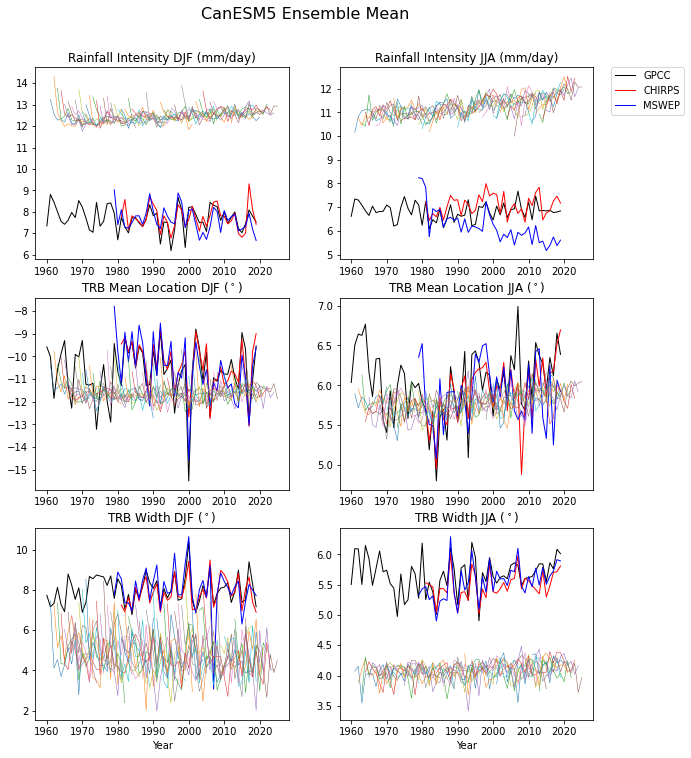

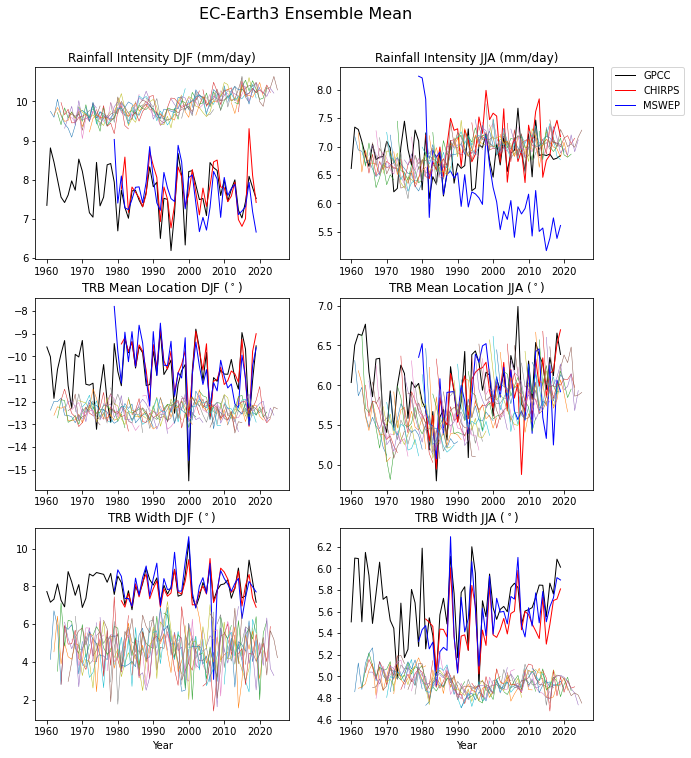

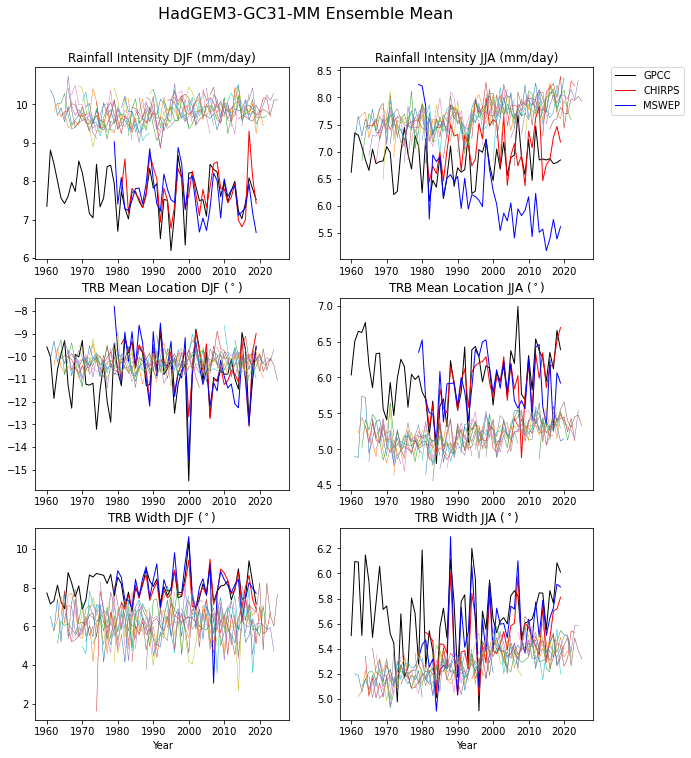

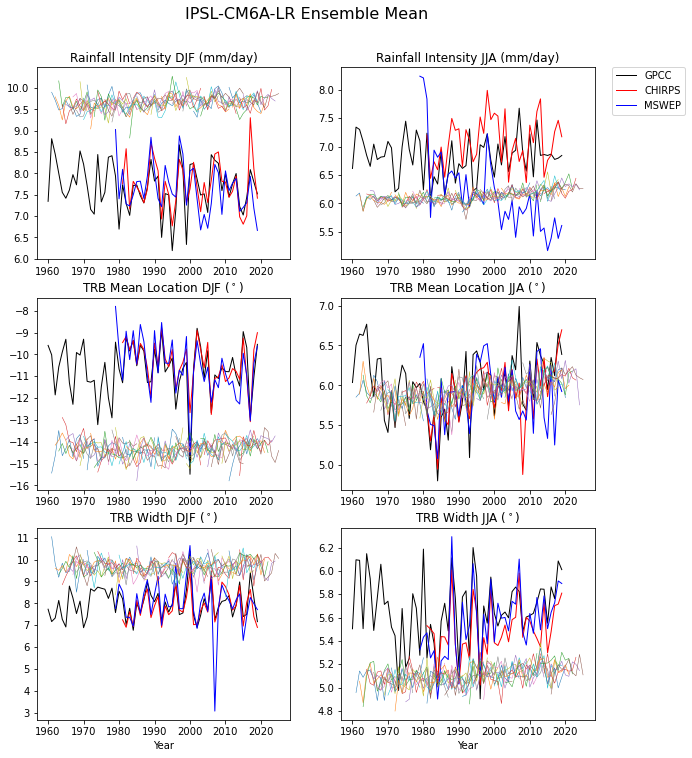

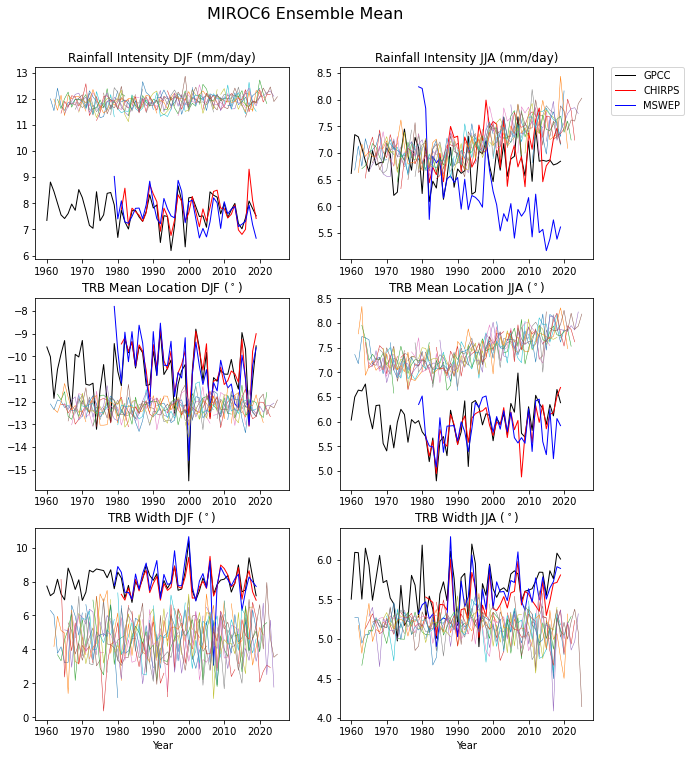

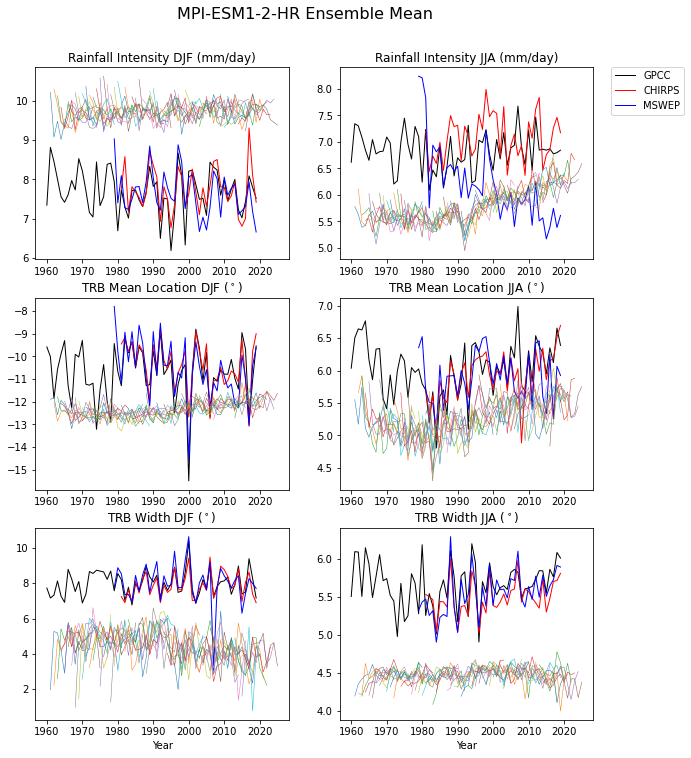

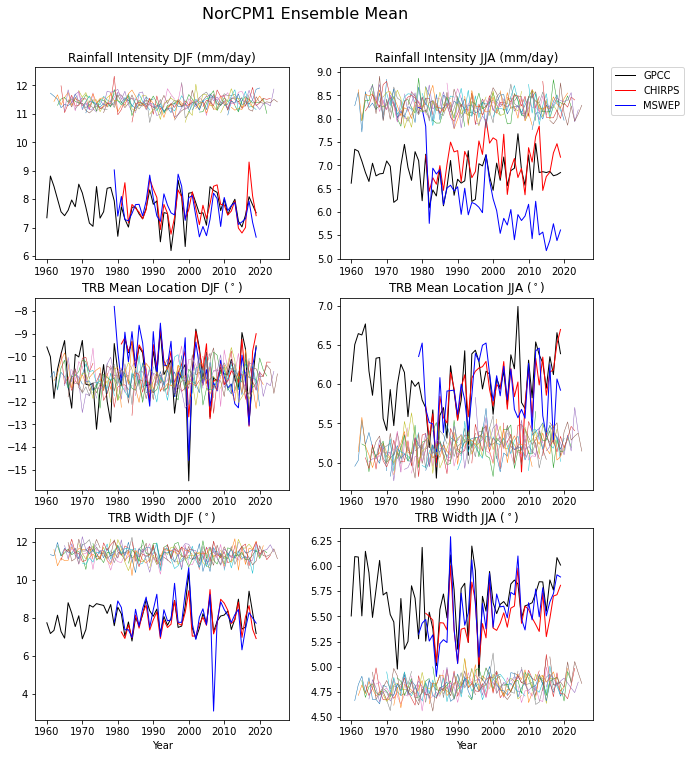

In [17]:
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt


dcpp_trbindices_directory = '/gws/pw/j05/cop26_hackathons/bristol/project02/data/DCPP/TRBindices'
obs_trbindices_directory = '/gws/pw/j05/cop26_hackathons/bristol/project02/data/obs/TRBindices'


model_namelist = ['CanESM5', 'EC-Earth3', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'NorCPM1']
obs_namelist = ['GPCC', 'CHIRPS', 'MSWEP']
obs_colourlist = ['black', 'red', 'blue']

obs_data_list_djf = list()
obs_data_list_jja = list()
for obs_name in obs_namelist:
    obs_filelist = glob.glob(obs_trbindices_directory+'/'+obs_name+'/*.nc')
    obs_filelist.sort()

    # Selection conditions
    obs_data = xr.open_mfdataset(obs_filelist)
    obs_data_indices = obs_data.gaussian_params
    is_djf = (obs_data_indices['time'].dt.season == 'DJF')
    is_jja = (obs_data_indices['time'].dt.season == 'JJA')
    obs_data_djf = obs_data_indices.isel(time=is_djf)
    obs_data_jja = obs_data_indices.isel(time=is_jja)

    obs_data_mean_djf = obs_data_djf.groupby('time.year').mean('time')
    obs_data_mean_djf_1960_2019 = obs_data_mean_djf.sel(year=slice(1960,2019))
    obs_data_list_djf.append(obs_data_mean_djf_1960_2019)
    
    obs_data_mean_jja = obs_data_jja.groupby('time.year').mean('time')
    obs_data_mean_jja_1960_2019 = obs_data_mean_jja.sel(year=slice(1960,2019))
    obs_data_list_jja.append(obs_data_mean_jja_1960_2019)


for model_name in model_namelist:
    model_filelist = glob.glob(dcpp_trbindices_directory+'/'+model_name+'/*.nc')
    model_filelist.sort()
    
    model_ensembles_all_djf = list()
    model_ensembles_all_jja = list()
    for model_file in model_filelist:
        model_dataset = xr.open_dataset(model_file)

        # Selection conditions
        is_djf = (model_dataset['time'].dt.season == 'DJF')
        is_jja = (model_dataset['time'].dt.season == 'JJA')


        model_ensemble_mean = model_dataset.gaussian_params.mean(dim='ensemble')
        model_ensemble_mean_djf = model_ensemble_mean.isel(time=is_djf)
        model_ensemble_mean_djf = model_ensemble_mean_djf.groupby('time.year').mean('time')
        model_ensembles_all_djf.append(model_ensemble_mean_djf)

        model_ensemble_mean_jja = model_ensemble_mean.isel(time=is_jja)
        model_ensemble_mean_jja = model_ensemble_mean_jja.groupby('time.year').mean('time')
        model_ensembles_all_jja.append(model_ensemble_mean_jja)

    fig, axs = plt.subplots(3, 2, figsize=(10,12))

    for idx, model_result in enumerate(range(len(obs_data_list_djf))):
        axs[0,0].plot(obs_data_list_djf[idx].year, obs_data_list_djf[idx][:,0], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
        axs[0,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,0], linewidth=0.5)
    axs[0,0].set_title('Rainfall Intensity DJF (mm/day)')

    for idx, model_result in enumerate(range(len(obs_data_list_djf))):
        axs[1,0].plot(obs_data_list_djf[idx].year, obs_data_list_djf[idx][:,1], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
        axs[1,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,1], linewidth=0.5)
    axs[1,0].set_title(r'TRB Mean Location DJF ($^\circ$)')

    for idx, model_result in enumerate(range(len(obs_data_list_djf))):
        axs[2,0].plot(obs_data_list_djf[idx].year, obs_data_list_djf[idx][:,2], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
        axs[2,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,2], linewidth=0.5)
    axs[2,0].set_title(r'TRB Width DJF ($^\circ$)')
    axs[2,0].set_xlabel('Year')



    for idx, model_result in enumerate(range(len(obs_data_list_jja))):
        axs[0,1].plot(obs_data_list_jja[idx].year, obs_data_list_jja[idx][:,0], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
        axs[0,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,0], linewidth=0.5)
    axs[0,1].legend(bbox_to_anchor=(1.05, 1.03), loc='upper left')
    axs[0,1].set_title('Rainfall Intensity JJA (mm/day)')

    for idx, model_result in enumerate(range(len(obs_data_list_jja))):
        axs[1,1].plot(obs_data_list_jja[idx].year, obs_data_list_jja[idx][:,1], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
        axs[1,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,1], linewidth=0.5)
    axs[1,1].set_title(r'TRB Mean Location JJA ($^\circ$)')

    for idx, model_result in enumerate(range(len(obs_data_list_jja))):
        axs[2,1].plot(obs_data_list_jja[idx].year, obs_data_list_jja[idx][:,2], 
                      label=obs_namelist[idx], color=obs_colourlist[idx], linewidth=1)
    for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
        axs[2,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,2], linewidth=0.5)
    axs[2,1].set_title(r'TRB Width JJA ($^\circ$)')
    axs[2,1].set_xlabel('Year')

    fig.suptitle(f'{model_name} Ensemble Mean', fontsize=16, y=0.95)

    plt.show()
#     plt.savefig(f'plots/model_spaghetti/DCPP_{model_name}.pdf', bbox_inches='tight')